In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers.experimental.preprocessing import Normalization
import numpy as np

# Data Augmentation Generator
augmenter = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory='./Dataset for CA1 part A - AY2425S1/train', 
    color_mode='grayscale', 
    batch_size=10000,
    image_size=(pixel, pixel),
    seed=42
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory='./Dataset for CA1 part A - AY2425S1/test',
    color_mode='grayscale',
    batch_size=10000,
    image_size=(pixel, pixel),
    seed=42
)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory='./Dataset for CA1 part A - AY2425S1/validation',
    color_mode='grayscale',
    batch_size=10000,
    image_size=(pixel, pixel),
    seed=42
)

# Convert to numpy arrays
for image, label in train_data:
    X_train = image
    y_train = label

X_train = X_train / 255.0
y_train = to_categorical(y_train, 15)

for image, label in test_data:
    X_test = image
    y_test = label

X_test = X_test / 255.0
y_test = to_categorical(y_test, 15)

for image, label in validation_data:
    X_validate = image
    y_validate = label

X_validate = X_validate / 255.0
y_validate = to_categorical(y_validate, 15)

# Balance the dataset with data augmentation
# Balance the dataset with data augmentation
class_counts = np.bincount(y_train.argmax(axis=1))
max_class_count = 1000  # Set the desired count of augmented images per class

X_train_augmented = []
y_train_augmented = []

for class_idx in range(15):
    class_mask = y_train.argmax(axis=1) == class_idx
    X_class = X_train[class_mask]
    y_class = y_train[class_mask]
    
    if len(X_class) < max_class_count:
        augment_count = max_class_count - len(X_class)
        
        # Generate augmented data
        augment_data = augmenter.flow(X_class, y_class, batch_size=augment_count, shuffle=False)
        augmented_images, augmented_labels = augment_data.next()
        
        X_train_augmented.append(augmented_images)
        y_train_augmented.append(augmented_labels)
    else:
        X_train_augmented.append(X_class[:max_class_count])
        y_train_augmented.append(y_class[:max_class_count])

X_train_augmented = np.concatenate(X_train_augmented, axis=0)
y_train_augmented = np.concatenate(y_train_augmented, axis=0)

# Normalize the data
pre_processing_v1 = Normalization()
pre_processing_v1.adapt(X_train_augmented)
X_train_augmented = pre_processing_v1(X_train_augmented)
X_test = pre_processing_v1(X_test)
X_validate = pre_processing_v1(X_validate)

Found 9043 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


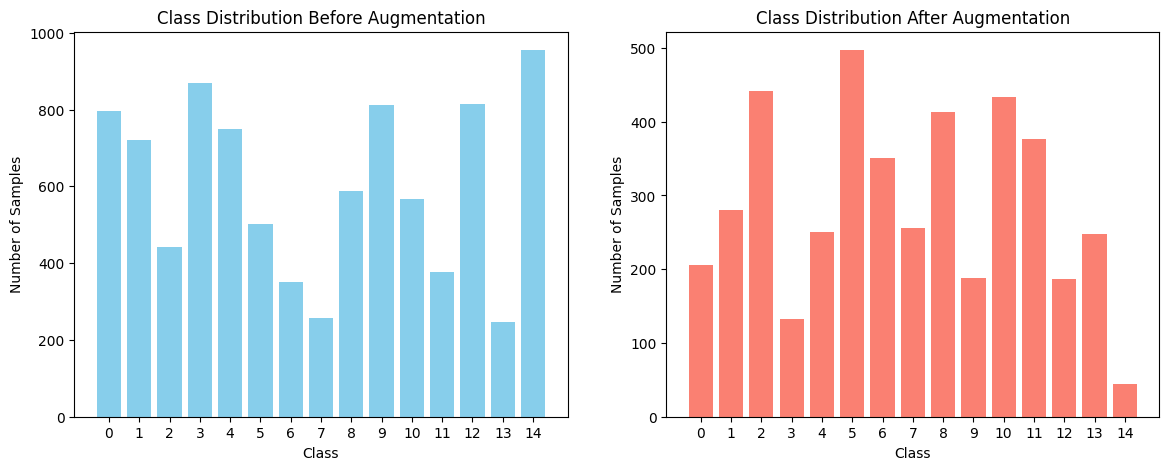

In [42]:
import matplotlib.pyplot as plt



# Count the samples in each class before augmentation
class_counts_before = np.bincount(y_train.argmax(axis=1))

# Count the samples in each class after augmentation
class_counts_after = np.bincount(y_train_augmented.argmax(axis=1))

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart before augmentation
ax[0].bar(range(15), class_counts_before, color='skyblue')
ax[0].set_title('Class Distribution Before Augmentation')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of Samples')
ax[0].set_xticks(range(15))
ax[0].set_xticklabels(range(15))

# Bar chart after augmentation
ax[1].bar(range(15), class_counts_after, color='salmon')
ax[1].set_title('Class Distribution After Augmentation')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Number of Samples')
ax[1].set_xticks(range(15))
ax[1].set_xticklabels(range(15))

plt.show()

In [31]:
print(len(X_train),len(X_train_augmented))

9043 12896


In [22]:
class_labels = {0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}
classes = len(class_labels)

TypeError: only integer scalar arrays can be converted to a scalar index

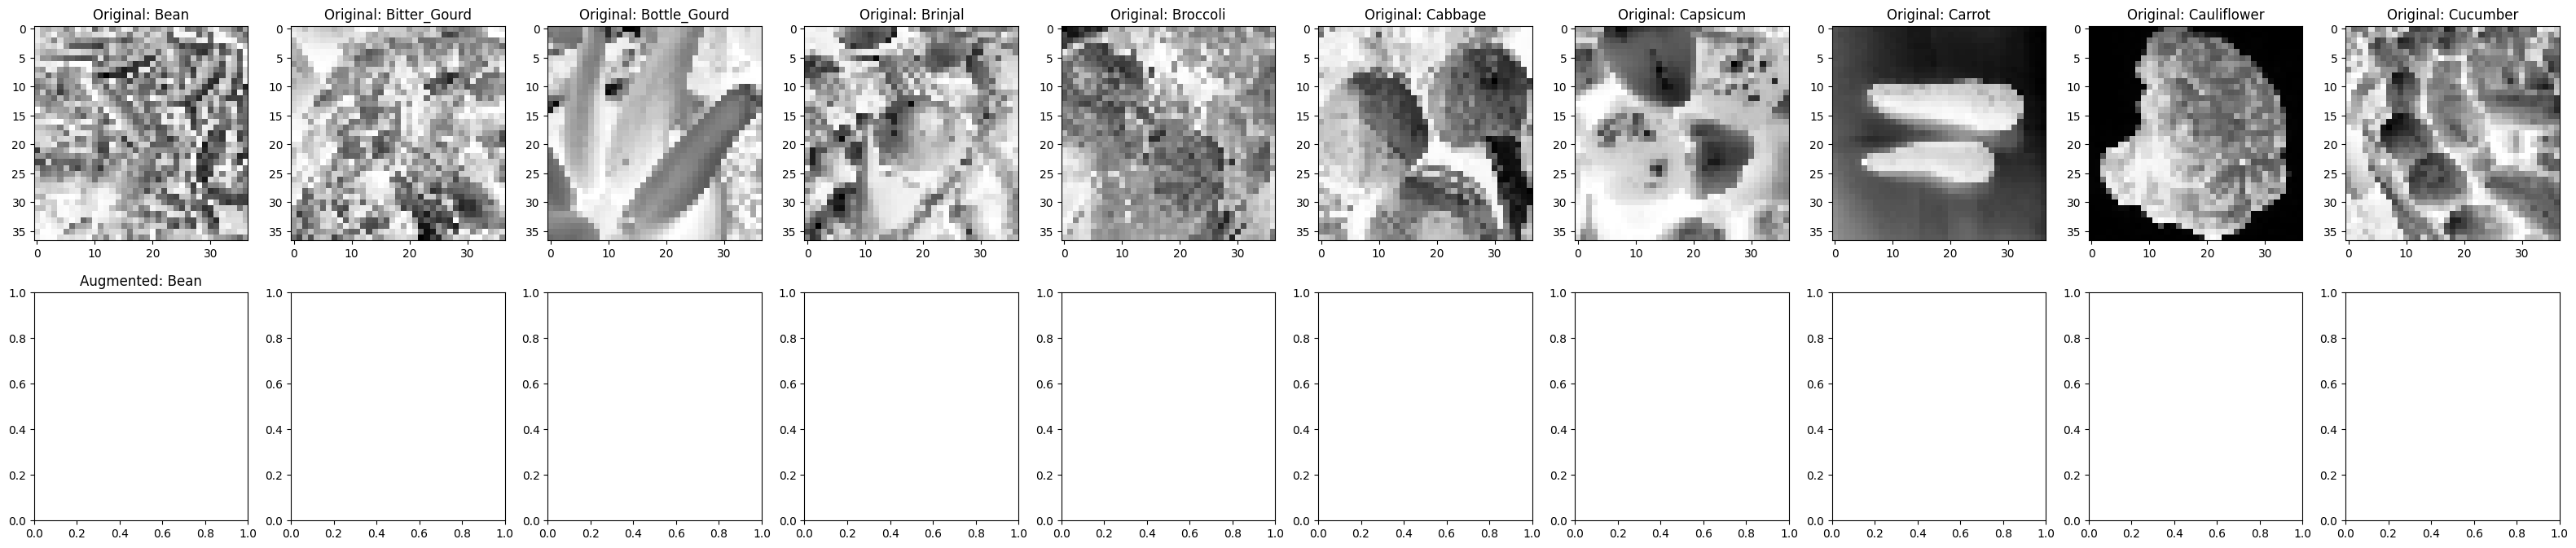

In [23]:
fig, ax = plt.subplots(2, 10, figsize=(40, 8))
for idx in range(20):
    subplot = ax.ravel()[idx]
    y_label = np.argmax(y_train, axis=1)
    if idx >= 10:
        subplot.set_title(f"Augmented: {class_labels[idx % 10]}")
        subplot.imshow(X_train_augmented[y_label == idx % 10][0], cmap='Greys')
    else:
        subplot.set_title(f"Original: {class_labels[idx % 10]}")
        subplot.imshow(X_train[y_label == idx % 10][0], cmap='Greys')
    subplot.axis("on")
plt.show()